<a href="https://colab.research.google.com/github/ITALOZDKJ/Me-tornando-um-analista-de-dados/blob/main/new_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perguntas interessantes a serem respondidas:

### 1 - Bairros mais frequentes e sua proporção - Check
### 2 - Bairros mais caros e mais baratos
### 3 - Tipos de quarto seus preços
### 4 - Clientes frequentes*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.isnull().mean()

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.iloc[1:10,5:8]

,neighbourhood,latitude,longitude
1,Midtown,40.75362,-73.98377
2,Harlem,40.80902,-73.94190
3,Clinton Hill,40.68514,-73.95976
4,East Harlem,40.79851,-73.94399
5,Murray Hill,40.74767,-73.97500
6,Bedford-Stuyvesant,40.68688,-73.95596
7,Hell's Kitchen,40.76489,-73.98493
8,Upper West Side,40.80178,-73.96723
9,Chinatown,40.71344,-73.99037


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df_trab = df.drop(columns=['latitude','longitude'])
df_trab = df_trab.dropna()

In [ ]:
df_trab

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


## Bairros e "sub bairro" -- FREQUÊNCIA

In [ ]:
df_trab['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
bairros = pd.DataFrame(df_trab.groupby(by='neighbourhood_group').count()['host_id'].sort_values(ascending=False))
bairros.head()

,host_id
neighbourhood_group,
Manhattan,16621
Brooklyn,16439
Queens,4572
Bronx,875
Staten Island,314


In [ ]:
bairros.head(2).sum()/df_trab['neighbourhood_group'].count()

host_id    0.851601
dtype: float64

In [ ]:
sub_bairro = pd.DataFrame(df_trab.groupby(by='neighbourhood').count()['host_id'].sort_values(ascending=False))
sub_bairro.head()

,host_id
neighbourhood,
Williamsburg,3163
Bedford-Stuyvesant,3141
Harlem,2204
Bushwick,1942
Hell's Kitchen,1528


In [ ]:
sub_bairro.head().sum()/df_trab.neighbourhood.count()

host_id    0.656964
dtype: float64

In [ ]:
values =  ['Williamsbur','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Site']
df_trab[df_trab.neighbourhood.isin(values)]['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan'], dtype=object)

#### Os locais com mais imóveis airbnb para alugar, são Manhattan e Brooklyn, sendo que, ambos somados correspondem a 85,5% do total de airbnbs de Nova York 

## Bairros e sub bairros -- PREÇO

In [ ]:
bairros_preco = pd.DataFrame(df_trab.groupby(by='neighbourhood_group').mean()['price']).sort_values(by='price', ascending=False)

In [ ]:
round(bairros_preco,2)

,price
neighbourhood_group,
Manhattan,180.07
Brooklyn,121.46
Queens,95.78
Staten Island,89.96
Bronx,79.56


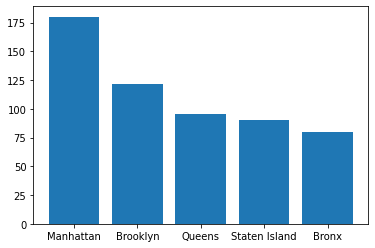

In [ ]:
bairro_nome = bairros_preco.index
medias = list(round(bairros_preco['price'],2))
plt.bar(bairro_nome, medias)
plt.show()

### Sub bairro

In [ ]:
sub_bairro_preco = pd.DataFrame(df_trab.groupby(by='neighbourhood').mean()['price'].sort_values(ascending=False))


In [ ]:
round(sub_bairro_preco,2).head()

,price
neighbourhood,
Sea Gate,482.50
Tribeca,460.30
NoHo,298.45
Flatiron District,291.48
SoHo,281.30


In [ ]:
values = sub_bairro_preco.index[:10]
mais_caros = df_trab[df_trab['neighbourhood'].isin(values)]

In [ ]:
mais_caros.groupby(by=['neighbourhood']).count().sort_values(by='host_id')

,id,name,host_id,host_name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,
Willowbrook,1,1,1,1,1,1,1,1,1,1,1,1,1
Neponsit,3,3,3,3,3,3,3,3,3,3,3,3,3
Sea Gate,4,4,4,4,4,4,4,4,4,4,4,4,4
Flatiron District,58,58,58,58,58,58,58,58,58,58,58,58,58
NoHo,62,62,62,62,62,62,62,62,62,62,62,62,62
Tribeca,110,110,110,110,110,110,110,110,110,110,110,110,110
SoHo,287,287,287,287,287,287,287,287,287,287,287,287,287
Greenwich Village,306,306,306,306,306,306,306,306,306,306,306,306,306
West Village,610,610,610,610,610,610,610,610,610,610,610,610,610


In [ ]:
bairrosB = pd.DataFrame(mais_caros.groupby(by='neighbourhood_group').count()['host_id']).sort_values(by='host_id', ascending=False)

In [ ]:
bairrosB

,host_id
neighbourhood_group,
Manhattan,2419
Brooklyn,4
Queens,3
Staten Island,1


In [ ]:
bairrosB['host_id'].head(1)/bairrosB['host_id'].sum()

neighbourhood_group
Manhattan    0.996704
Name: host_id, dtype: float64

### Manhattan é disparada o bairro com mais airbnb e com a média de preço mais alta!

### Tipos de quarto

In [ ]:
df_trab['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df_trab.groupby(by='room_type').count()['host_id']

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: host_id, dtype: int64

In [ ]:
pd.DataFrame(round(df_trab.groupby(by='room_type').mean()['price'],2))

,price
room_type,
Entire home/apt,196.32
Private room,83.99
Shared room,63.21


In [ ]:
value = ['Manhattan']
em_mh = df_trab[df['neighbourhood_group'].isin(value)]

/tmp/ipykernel_24073/3208387287.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  em_mh = df_trab[df['neighbourhood_group'].isin(value)]


In [ ]:
manh = pd.DataFrame(em_mh.groupby(by='room_type').count()['host_id'])

In [ ]:
manh.head(1)['host_id']/manh['host_id'].sum()

room_type
Entire home/apt    0.599362
Name: host_id, dtype: float64

### Manhattan, além de ser o bairro com o maior número de airbnb, com a maior média de preço, cerca de 59,9% de seus airbnbs, são do tipo mais caro!